<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/MissForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable.xlsx')
df = df.iloc[:, 1:]
df.head()

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L14:WBC,Sex,Age,NATNL,Location,PricipalProblemCode,PricipalProblemName,InPatient,OutPatient,Emergency
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,9.41,หญิง,75.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0.0,1.0,0.0
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,NaN,หญิง,76.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0.0,1.0,0.0
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,5.42,หญิง,78.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0.0,1.0,0.0
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,NaN,หญิง,79.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,F411,Generalized anxiety disorder,0.0,1.0,0.0
4,2304,4916314,28.287500,0,0,0,0,0,0,0,...,NaN,หญิง,58.0,ไทย,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,NaN,NaN,0.0,1.0,0.0


In [ ]:
data = pd.DataFrame(df)
remove = ['L12:Hemoglobin','L13:Hematocrit','L16:TIBC','L17:Tranferin SAT',
          'L18:Ferritin','L25:Parathyroid hormone','L26:Vitamin D','L27:UrineAlbumin/Cr ratio',
          'L28:UrineProtein/Cr ratio','L29:UrineVolume (24hrs)','L30:UrineUrea (24hrs)',
          'L31:UrineSodium (24hrs)','L32:UrineProtein (24hrs)']
data = data.drop(remove, axis=1)

In [ ]:
data['Age'] = data['Age'].fillna('69')
data['Sex'] = data['Sex'].fillna('หญิง')
data['NATNL'] = data['NATNL'].fillna('ไทย')
data['Location'] = data['Location'].fillna('ห้องปฏิบัติการจุลทรรศน์วินิจฉัย')
data['InPatient'] = data['InPatient'].fillna(0)
data['OutPatient'] = data['OutPatient'].fillna(1)
data['Emergency'] = data['Emergency'].fillna(0)
data['PricipalProblemCode'] = data['PricipalProblemCode'].fillna('None')
data['PricipalProblemName'] = data['PricipalProblemName'].fillna('None')

In [ ]:
null_count = data.isnull().sum()
null_columns = null_count[null_count > 0]
non_null_columns = null_count[null_count == 0]
print("Columns with Non-Null Values:")
for column_name in non_null_columns.index:
    print(column_name)
print("\nColumns with Null Values and Their Counts:")
print(null_columns)

Columns with Non-Null Values:
PatientUID
PatientVisitUID
Slopes
G1M2:ARB
G3M1:Statin
G5M2:NSAIDs
G1M5:Diuretic
G1M7:Beta blocker
G1M3:Dihydropyridine CCB
G1M6:MRA
G1M1:ACEI
G2M2:Metformin
G2M3:DPP4 inhibitor
G2M1:SU
G3M3:Fibrate
G2M5:SGLT2i
G4M1:Allopurinol
G1M9:Vasodilator
G1M8:Alpha blocker
G2M6:Insulin
G2M4:TZD
G4M2:Febuxostat
G3M2:Ezetimibe
G1M4:Non-dihydropyridine CCB
G5M1:Ketoanalog amino acid
G2M7:GLP1-RA
G4M3:Uricosuric agent
D1:Hypertension
D2:Diabetes millitus
D3:Dyslipidemia
D4:SLE
D5:Systemic sclerosis
D6:Rheumatoid arthritis
D7:HIV infection
D8:HBV infection
D9:HCV infection
D10:Ischemic heart disease
D11:Heart failure
L1:eGFR
Sex
Age
NATNL
Location
PricipalProblemCode
PricipalProblemName
InPatient
OutPatient
Emergency

Columns with Null Values and Their Counts:
Systolic BP             4884
Diastolic BP            4913
BMI                    14807
BSA                    14808
L2:BUN                 13507
L3:Creatinine              1
L4:Sodium              20808
L5:Potassiu

**MICE + missforest โดยทำ MICE แค่ที่มีความสัมพันธ์กับตัวแปรที่ไม่มีค่าว่างสูง**

In [ ]:
!pip install statsmodels

<ipython-input-7-3b1576d2c98c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


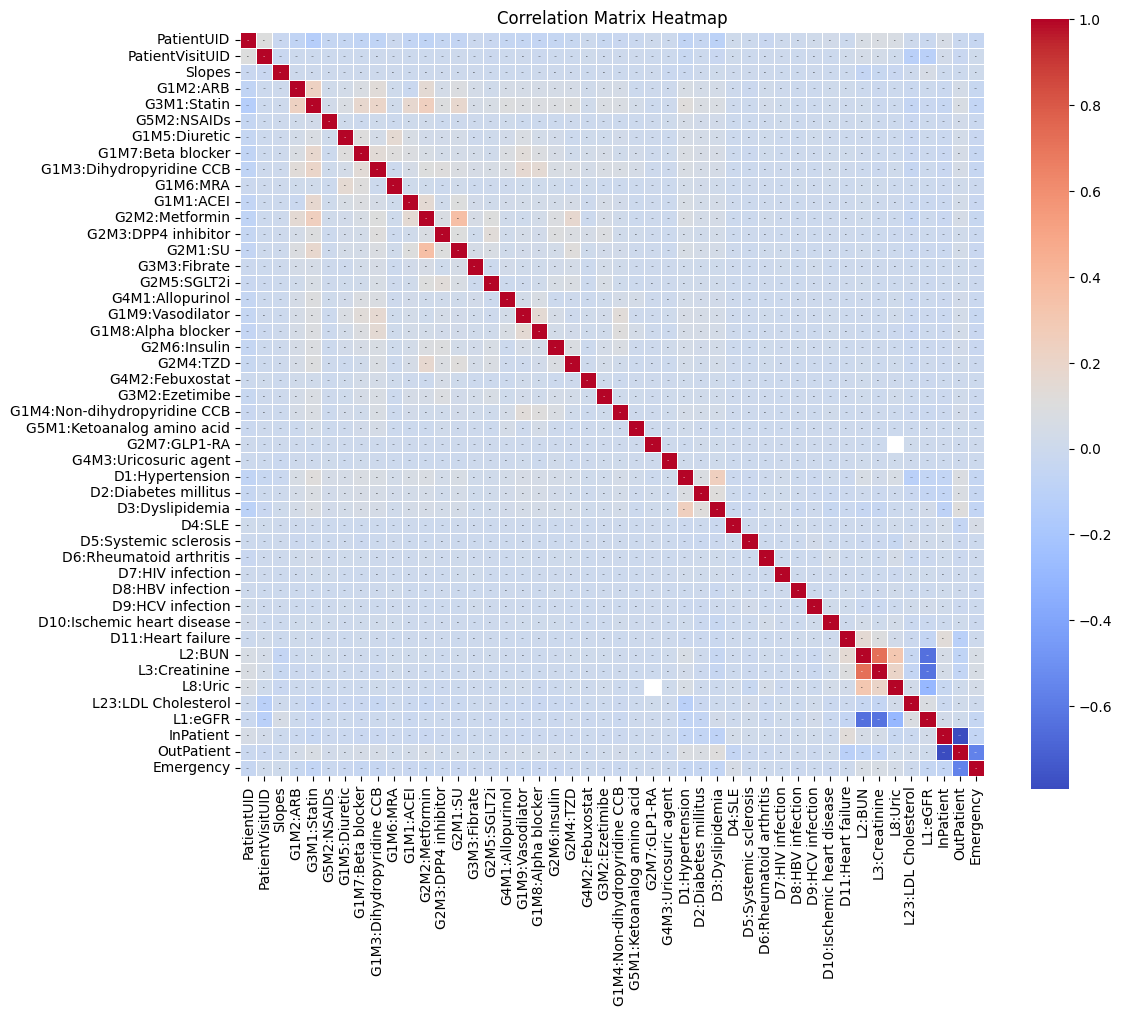

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a larger heatmap with customizations
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar=True,  # Add color bar
    square=True,  # Make the heatmap square
    annot_kws={"size": 1}  # Increase font size of annotations
)
plt.title("Correlation Matrix Heatmap")
plt.show()


## **MissForest All**

In [ ]:
null_count = data.isnull().sum()
null_columns = null_count[null_count > 0]
non_null_columns = null_count[null_count == 0]
print(null_columns)

Systolic BP             4884
Diastolic BP            4913
BMI                    14807
BSA                    14808
L2:BUN                 13507
L3:Creatinine              1
L4:Sodium              20808
L5:Potassium           18392
L6:Chloride            20896
L7:Bicarbonate         20717
L8:Uric                38636
L9:Calcium             39893
L10:Phosphorus         40243
L11:Albumin            29173
L15:Platelet           22468
L19:Blood sugar        22565
L20:HbA1c              26843
L21:Cholesterol        18632
L22:Triglyceride       25959
L23:LDL Cholesterol    22559
L24:HDL Cholesterol    26242
L14:WBC                22468
dtype: int64


In [ ]:
!pip install scikit-learn
from sklearn.neighbors import NearestNeighbors

In [ ]:
import pandas as pd
from missingpy import MissForest

# Rename columns to have simple alphanumeric names
data = data.rename(columns=lambda x: x.replace(" ", "").replace(":", "").replace("-", "").replace("/", "").replace("&", "").replace("#", ""))

# Columns to impute using MissForest
columns_to_impute = ['SystolicBP', 'DiastolicBP', 'BMI', 'BSA', 'L5Potassium',
                     'L7Bicarbonate', 'L8Uric', 'L9Calcium', 'L10Phosphorus',
                     'L11Albumin', 'L14WBC', 'L15Platelet', 'L19Bloodsugar',
                     'L20HbA1c', 'L22Triglyceride', 'L24HDLCholesterol',
                     'L2BUN','L3Creatinine','L4Sodium','L6Chloride',
                     'L21Cholesterol','L23LDLCholesterol']

# Initialize the MissForest imputer
imputer = MissForest()

# Fit and transform the specified columns using MissForest
data_imputed = imputer.fit_transform(data[columns_to_impute])

# Replace the original columns with imputed values
data[columns_to_impute] = data_imputed


ModuleNotFoundError: ignored

In [ ]:
column_rename_dict = {
    'G1M2ARB': 'G1M2:ARB','G3M1Statin': 'G3M1:Statin','G5M2NSAIDs': 'G5M2:NSAIDs','G1M5Diuretic': 'G1M5:Diuretic',
    'G1M7Betablocker': 'G1M7:Beta blocker','G1M3DihydropyridineCCB': 'G1M3:Dihydropyridine CCB','G1M6MRA': 'G1M6:MRA','G1M1ACEI': 'G1M1:ACEI',
    'G2M2Metformin': 'G2M2:Metformin','G2M3DPP4inhibitor': 'G2M3:DPP4 inhibitor','G2M1SU': 'G2M1:SU','G3M3Fibrate': 'G3M3:Fibrate',
    'G2M5SGLT2i': 'G2M5:SGLT2i','G4M1Allopurinol': 'G4M1:Allopurinol','G1M9Vasodilator': 'G1M9:Vasodilator','G1M8Alphablocker': 'G1M8:Alpha blocker',
    'G2M6Insulin': 'G2M6:Insulin','G2M4TZD': 'G2M4:TZD','G4M2Febuxostat': 'G4M2:Febuxostat','G3M2Ezetimibe': 'G3M2:Ezetimibe',
    'G1M4NondihydropyridineCCB': 'G1M4:Non-dihydropyridine CCB','G5M1Ketoanalogaminoacid': 'G5M1:G5M1:Ketoanalog amino acid','G2M7GLP1RA': 'G2M7:GLP1-RA','G4M3Uricosuricagent': 'G4M3:Uricosuric agent',
    'D1Hypertension': 'D1:Hypertension','D2Diabetesmillitus': 'D2:Diabetes millitus','D3Dyslipidemia': 'D3:Dyslipidemia',
    'D4SLE': 'D4:SLE','D5Systemicsclerosis': 'D5:Systemic sclerosis','D6Rheumatoidarthritis': 'D6:Rheumatoid arthritis','D7HIVinfection': 'D7:HIV infection',
    'D8HBVinfection': 'D8:HBV infection','D9HCVinfection': 'D9:HCV infection','D10Ischemicheartdisease': 'D10:Ischemic heart disease','D11Heartfailure': 'D11:Heart failure',
    'L2BUN': 'L2:BUN','L3Creatinine': 'L3:Creatinine','L4Sodium': 'L4:Sodium','L5Potassium': 'L5:Potassium',
    'L6Chloride': 'L6:Chloride','L7Bicarbonate': 'L7:Bicarbonate','L8Uric': 'L8:Uric','L9Calcium': 'L9:Calcium',
    'L10Phosphorus': 'L10:Phosphorus','L11Albumin': 'L11:Albumin','L15Platelet': 'L15:Platelet','L19Bloodsugar': 'L19:Blood sugar',
    'L20HbA1c': 'L20:HbA1c','L21Cholesterol': 'L21:Cholesterol','L22Triglyceride': 'L22:Triglyceride','L23LDLCholesterol': 'L23:LDL Cholesterol',
    'L24HDLCholesterol': 'L24:HDL Cholesterol','L1eGFR': 'L1:eGFR','L14WBC': 'L14:WBC'
}
# Use the rename method to rename the columns
data.rename(columns=column_rename_dict, inplace=True)


In [ ]:
data